テキスト： [経済・ファイナンスデータの計量時系列分析 (統計ライブラリー) | 沖本 竜義 |本 | 通販 | Amazon](https://www.amazon.co.jp/%E7%B5%8C%E6%B8%88%E3%83%BB%E3%83%95%E3%82%A1%E3%82%A4%E3%83%8A%E3%83%B3%E3%82%B9%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E8%A8%88%E9%87%8F%E6%99%82%E7%B3%BB%E5%88%97%E5%88%86%E6%9E%90-%E7%B5%B1%E8%A8%88%E3%83%A9%E3%82%A4%E3%83%96%E3%83%A9%E3%83%AA%E3%83%BC-%E6%B2%96%E6%9C%AC-%E7%AB%9C%E7%BE%A9/dp/4254127928)

# 7 GARCHモデル
## 7.1 ボラティリティのモデル化の重要性
**ボラティリティ：** 金融分野で標準偏差のことをなぜかこうよぶらしい。値動きの激しさといった感じがある。  
たぶん以下のようなとき、ある金融商品の価格のボラティリティが将来どうなるか予測したいニーズがある。

- 何らかの理由で株式をたくさんもっていて、99%最悪なケースでどれくらい損失額が出るのか知りたい。
- オプション（≒株価のボラティリティが大きいほど収益の期待値が高くなるような金融商品）を買うとき、いまの価格がお買い得なのかお買い損なのか知りたい。

Q.「ボラティリティを予測したいといっても、効率的市場仮説が正しいなら、将来の値動きは予測できないのでは？」  
A.「値動きの激しさが予測できないとは言っていない」

明日株価が上がるか下がるかは全く予測できないノイズ成分かもしれない。  
でも、そのノイズ成分の分散の大きさは予測できるかもしれない。

---

以下のページから日経平均株価の日次データを取得してみる。  
https://indexes.nikkei.co.jp/nkave/index?type=download  
以下のモデルでフィッティングする。ARIMA(0,0,0) というかただの定数＋残差である。

$$ y_t = \mu + u_t, \; \; u_t \sim {\rm W.N.}(\sigma^2) \tag{7.1}$$

        データ日付        終値        始値        高値        安値
0  2015/01/05  17408.71  17325.68  17540.92  17219.22
1  2015/01/06  16883.19  17101.58  17111.36  16881.73
2  2015/01/07  16885.33  16808.26  16974.61  16808.26
3  2015/01/08  17167.10  17067.40  17243.71  17016.09
4  2015/01/09  17197.73  17318.74  17342.65  17129.53
          データ日付        終値        始値        高値        安値
895  2018/08/24  22601.77  22484.01  22602.24  22452.42
896  2018/08/27  22799.64  22693.69  22838.06  22682.39
897  2018/08/28  22813.47  22967.74  23006.77  22813.47
898  2018/08/29  22848.22  22820.86  22968.18  22819.97
899  2018/08/30  22869.50  23020.18  23032.17  22832.83

原系列をプロット


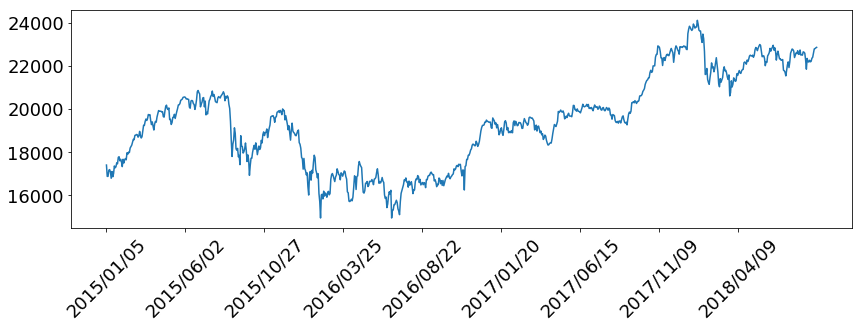

対数差分系列をプロット (時系列データに対して変化分が小さいときは ≒ 収益率)


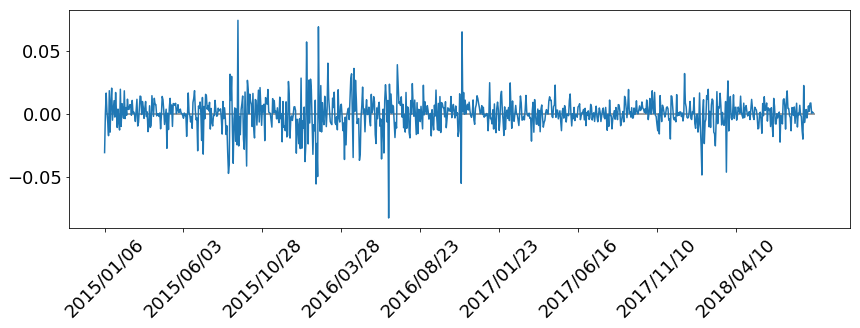

対数差分系列を (7.1)式＝(0,0,0)次のARIMAモデルに当てはめ
定数項：  [ 0.00030349]

残差系列のコレログラムをプロット


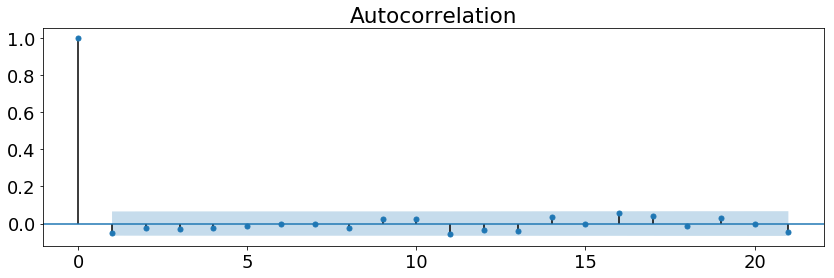

In [12]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.size'] = 18

# データ読み込み
df = pd.read_csv('data/nikkei_stock_average_daily_jp.csv', nrows=900)
print(df.head())
print(df.tail())
print('')

print('原系列をプロット')
fig, ax = plt.subplots(nrows=1, figsize=(14, 4))
ax.plot(range(df.shape[0]), df['終値'], linewidth=1.5)
plt.xticks(range(df.shape[0])[::100], df['データ日付'][::100], rotation=45)
plt.show()

print('対数差分系列をプロット (時系列データに対して変化分が小さいときは ≒ 収益率)')
y = np.diff(np.log(df['終値'].values))
fig, ax = plt.subplots(nrows=1, figsize=(14, 4))
ax.hlines(y=0.0, xmin=0, xmax=df.shape[0], colors='gray', linewidth=1.5)
ax.plot(range(df.shape[0] - 1), y, linewidth=1.5)
plt.xticks(range(df.shape[0] - 1)[::100], df['データ日付'][1::100], rotation=45)
plt.show()

print('対数差分系列を (7.1)式＝(0,0,0)次のARIMAモデルに当てはめ')
model = ARIMA(y, order=(0, 0, 0)).fit(dist=False)
print('定数項： ', model.params) # 定数項
print('')

print('残差系列のコレログラムをプロット')
fig, ax = plt.subplots(nrows=1, figsize=(14, 4))
sm.graphics.tsa.plot_acf(model.resid, lags=21, ax=ax)
plt.show()

対数差分系列は全然意味のある自己相関をもっていない。＝ 今日までの収益率に明日の収益率の手がかりなんてない。  

では、残差の大きさは自己相関をもつのだろうか？

残差系列をプロット


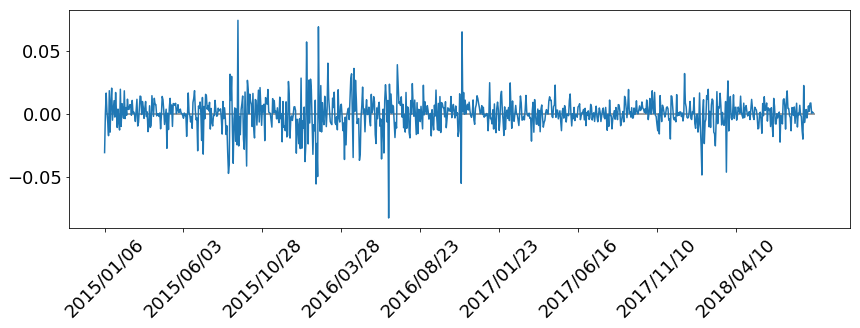

残差系列の2乗をプロット


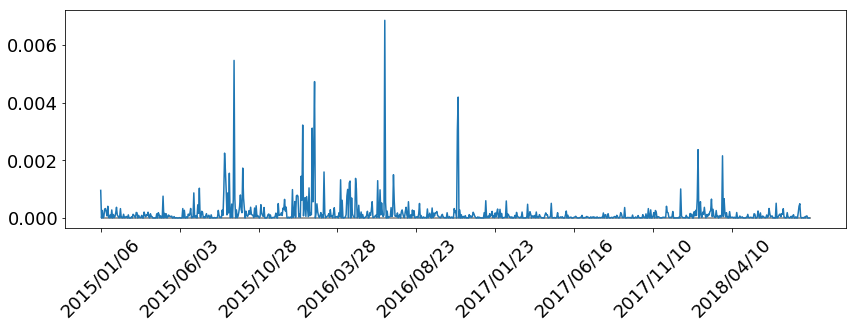

残差系列の2乗のコレログラムをプロット


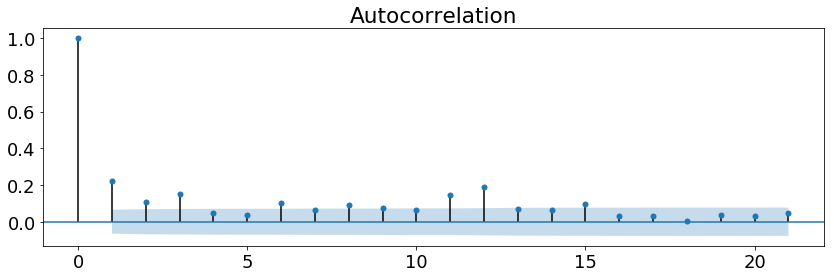

In [13]:
print('残差系列をプロット')
fig, ax = plt.subplots(nrows=1, figsize=(14, 4))
ax.hlines(y=0.0, xmin=0, xmax=df.shape[0], colors='gray', linewidth=1.5)
ax.plot(range(df.shape[0] - 1), model.resid, linewidth=1.5)
plt.xticks(range(df.shape[0] - 1)[::100], df['データ日付'][1::100], rotation=45)
plt.show()

print('残差系列の2乗をプロット')
fig, ax = plt.subplots(nrows=1, figsize=(14, 4))
ax.hlines(y=0.0, xmin=0, xmax=df.shape[0], colors='gray', linewidth=1.5)
ax.plot(range(df.shape[0] - 1), model.resid * model.resid, linewidth=1.5)
plt.xticks(range(df.shape[0] - 1)[::100], df['データ日付'][1::100], rotation=45)
plt.show()

print('残差系列の2乗のコレログラムをプロット')
fig, ax = plt.subplots(nrows=1, figsize=(14, 4))
sm.graphics.tsa.plot_acf(model.resid * model.resid, lags=21, ax=ax)
plt.show()

残差系列の2乗には意味のある自己相関が観測される（ちょっとだけど）。つまり、  
- 今日の誤差の大きさが大きかったら明日の誤差の大きさも大きそう。  
- 今日の誤差の大きさが小さかったら明日の誤差の大きさも小さそう。

というわけで、変動するボラティリティを予測したいニーズがあるし、実際自己相関があって予測できそう。  
ただ、これまで扱ってきたモデルでは条件付き標準偏差が一定であることを仮定していた。例えばARMAモデルはこう。

$$ y_t = c + \phi_1 y_{t-1} + \cdots + \phi_p y_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \cdots + \theta_q \varepsilon_{t-q}, \; \; \varepsilon_t \sim {\rm W.N.}(\sigma ^2) \tag{2.16}$$

なので、標準偏差が時間変化するモデルを考える。例えばこう（$\mu_t$ は何らかの条件付き期待値のモデル）。

$$ y_t = \mu_t + u_t = \mu_t + \sqrt{h_t} v_t , \; \; v_t \sim {\rm iid} \, N(0,1) \tag{7.2}$$

このモデルでは、$y_{t-1}$ までを観測した下での分散の期待値は以下（ただし $h_t$ と $v_t$ は条件付き独立とする）。  
→ $h_t$ の期待値が分散の期待値そのもの。この $h_t$ をモデリングしたい。

$$ \begin{split} E \left[ (y_t - \mu_t)^2 \middle| \, y_{t-1}, y_{t-2}, \cdots \right] &= E(u_t^2 | \, y_{t-1}, y_{t-2}, \cdots) \\ &= E(h_t | \, y_{t-1}, y_{t-2}, \cdots) \cdot E(v_t^2 | \, y_{t-1}, y_{t-2}, \cdots) \\ &= E(h_t | \, y_{t-1}, y_{t-2}, \cdots) \cdot \left( V(v_t | \, y_{t-1}, y_{t-2}, \cdots) + E(v_t | \, y_{t-1}, y_{t-2}, \cdots)^2 \right) \\ &= E(h_t | \, y_{t-1}, y_{t-2}, \cdots) \end{split}  \tag{7.3}$$

- 考え方1： $h_t$ は $y_{t-1}$ までを観測した下で決定的だと考える＝ARCHモデル、GARCHモデル。
    - このとき $h_t$ は条件付き分散そのもの。
- 考え方2： $h_t$ は確率的な項を含むと考える＝確率的ボラティリティモデル（本書では扱わない）。
    - ノイズの大きさにもノイズがのると考える。

## 7.2 GARCHモデル

### 7.2.1 ARCHモデル (autoregressive conditional heteroskedasticity model)

**ARCH(m)モデル** ：「今日の分散は、昨日の誤差の2乗、一昨日の誤差の2乗、…で回帰されるのでは」といったモデル。

$$ \begin{cases} y_t = \mu_t + u_t = \mu_t + \sqrt{h_t} v_t , \; \; v_t \sim {\rm iid} \, N(0,1) \\ h_t = \omega + \alpha_1 u_{t-1}^2 + \alpha_2 u_{t-2}^2 + \cdots + \alpha_m u_{t-m}^2 \end{cases} \tag{7.4}$$

$w_t = u_t^2 - h_t$ とおくと以下のようにもかける。こうすると、$u_t^2$ をAR(m)過程でモデル化したものとみなせる。

$$ \begin{cases} y_t = \mu_t + u_t = \mu_t + \sqrt{h_t} v_t , \; \; v_t \sim {\rm iid} \, N(0,1) \\ u_t^2 = \omega + \alpha_1 u_{t-1}^2 + \alpha_2 u_{t-2}^2 + \cdots + \alpha_m u_{t-m}^2 + w_t \end{cases}$$

---

みなせるとあるんですが $w_t$ がホワイトノイズになっているのかよくわからない。期待値0と自己相関0はOKっぽい。分散が時不変について、$w_t$ の分散は $E(h_t^2)$ に比例するが、$\alpha_1, \cdots, \alpha_m$ がAR(m)モデルの定常条件を満たすなら無条件期待値 $E(h_t^2)$ は $t$ に依存しないのだと思う。たぶん。

$ E(w_t) = E(u_t^2 - h_t) = E(h_t v_t^2) - E(h_t) = E(h_t)E(v_t^2) - E(h_t) = E(h_t) - E(h_t) = 0$

$ \begin{split} E(w_t w_{t-k}) &= E \left((u_t^2 - h_t)(u_{t-k}^2 - h_{t-k})\right) = E \left((h_t v_t^2 - h_t)(h_{t-k} v_{t-k}^2 - h_{t-k})\right) \\ &= E(h_t h_{t-k} v_t^2 v_{t-k}^2 - h_t h_{t-k} v_t^2 - h_t h_{t-k} v_{t-k}^2 + h_t h_{t-k}) \\ &= E(h_t h_{t-k}) E(v_t^2 v_{t-k}^2) - E(h_t h_{t-k}) \\ &= \begin{cases} E(h_t^2)E(v_t^4) - E(h_t^2)  \; &(k = 0)\\ E(h_t h_{t-k})E(v_t^2)E(v_{t-k}^2) - E(h_t h_{t-k})=0 \; &(k \neq 0)\end{cases} \end{split}$

---

とにかくARCH(m)モデルは(7.4)式で $h_t$ を逐次的に計算していく。  
- $u^2$ の初期値としては $y_t - \mu_t$ の標本分散が用いられることが多い。
- また $h_t > 0$ が要請されるので(7.4)式に出てくるパラメータは全て0以上($\omega$ については $\omega>0$)という制約を課すことが多い。
- $u_t^2$ のAR特性方程式は $1 - \alpha_1 z - \alpha_2 z^2 - \cdots - \alpha_m z^m = 0$ だが、$\alpha_1, \cdots, \alpha_m \geqq 0$ が課されている場合、「AR特性方程式の全ての解の絶対値が1より大きい」と「$\alpha_1 + \cdots + \alpha_m < 1$」が同値。
   - $m=1,2$ は証明容易。$m \geqq 3$ についてはわかりません。
- さらに $u_t$ の4次モーメントが存在するためには、例えばARCH(1)なら $\alpha_1^2 < 1/3$ が必要。
   - 必要なのはわかった（証明はわかっていない）が、なぜ4次モーメントの話になったのかよくわからない。
   - 金融データでは「裾の厚い」（4次モーメントが正）分布が現れることがよく知られているので、普通そのようなモデルが同定されるはずということだとは思う。

#### 例
次の例で1期先95%信頼区間と1%分位点を求めてみよう。

$$ \begin{cases} y_t = u_t = \sqrt{h_t} v_t , \; \; v_t \sim {\rm iid} \, N(0,1) \\ h_t = 0.5 + 0.5 u_{t-1}^2 \end{cases}$$

無条件期待値は $E(u_t)=0$、$E(u_t^2)=0.5/(1-0.5)=1$ なので、何もデータを観測していない下では $u_t$ は $N(0,1)$ にしたがう。なので、何もデータを観測していない下では1期先95%信頼区間は $(-1.96, 1.96)$ で、1%分位点は $-2.33$ となる。

In [1]:
from scipy.stats import norm
print(norm.ppf(q=0.025, loc=0, scale=1))
print(norm.ppf(q=0.975, loc=0, scale=1))
print(norm.ppf(q=0.01, loc=0, scale=1))

-1.95996398454
1.95996398454
-2.32634787404


次に、時刻 $t$ に $y_t = u_t$ を観測した場合の期待値は、$E(u_{t+1}|\Omega_t)=0$、$E(u_{t+1}^2|\Omega_t)=0.5 + 0.5 u_t^2$ なので、$u_{t+1}$ は $N(0,0.5 + 0.5 u_t^2)$ にしたがう。よって、1期先95%信頼区間は $\left( -1.96 \sqrt{0.5 + 0.5 u_t^2}, 1.96 \sqrt{0.5 + 0.5 u_t^2} \right)$ で、1%分位点は $-2.33 \sqrt{0.5 + 0.5 u_t^2}$ となる。$u_t = 0, \pm1, \pm2$ の場合の具体的な値は以下。

In [2]:
import numpy as np
import pandas as pd
df = pd.DataFrame()
df['u_t'] = np.arange(-2, 3)
df['95%_conf_lower'] = norm.ppf(q=0.025, loc=0, scale=1) * np.sqrt(0.5 + 0.5 * df.u_t * df.u_t)
df['95%_conf_upper'] = norm.ppf(q=0.975, loc=0, scale=1) * np.sqrt(0.5 + 0.5 * df.u_t * df.u_t)
df['1%_percentile'] = norm.ppf(q=0.01, loc=0, scale=1) * np.sqrt(0.5 + 0.5 * df.u_t * df.u_t)
print(df)

   u_t  95%_conf_lower  95%_conf_upper  1%_percentile
0   -2       -3.098975        3.098975      -3.678279
1   -1       -1.959964        1.959964      -2.326348
2    0       -1.385904        1.385904      -1.644976
3    1       -1.959964        1.959964      -2.326348
4    2       -3.098975        3.098975      -3.678279


- $u_t = 0$ のとき（最も小さなショックだった）： 1期先の95%信頼区間の幅は短い（次も小さめのショック）。
- $u_t = \pm 1$ のとき（平均的なショックだった）：  1期先の95%信頼区間の幅は無条件のときと同じ。
- $u_t = \pm 2$ のとき（大きなショックだった）：  1期先の95%信頼区間の幅は長い（次も大きめのショック）。

※ ここでたぶんショックとは $u_t$ の $E(u_t|\Omega_{t-1})$ からのずれ。

先の例だと、$u_{t-1}^2$ の係数が $0.5$ だったが、これを色々変えるとどうなるか見てみる。  
下の例で $\alpha_1 = 0, 0.1, 0.3, 0.5, 0.7, 0.9$ としてみる。

$$ \begin{cases} y_t = u_t = \sqrt{h_t} v_t , \; \; v_t \sim {\rm iid} \, N(0,1) \\ h_t = 1 - \alpha_1 + \alpha_1 u_{t-1}^2 \end{cases} \tag{7.5}$$

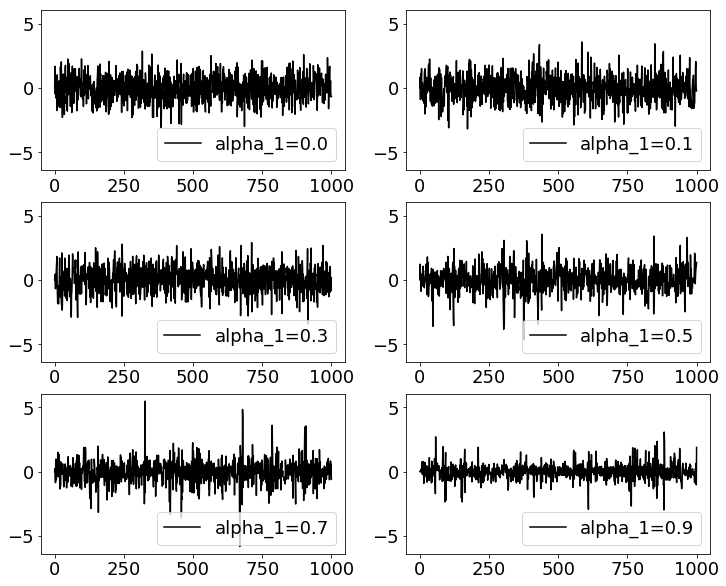

In [15]:
np.random.seed(7)
n_points = 1000
def create_data(alpha_1):
    u = 0
    vec_u = [u]
    for i in range(n_points):
        u = np.sqrt(1 - alpha_1 + alpha_1 * u * u) * np.random.randn()
        vec_u.append(u)
    return vec_u

from matplotlib import pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.size'] = 18
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(3, 2, 1)
ax.plot(range(n_points + 1), create_data(0.0), color='black', linewidth=1.5, label='alpha_1=0.0')
plt.legend(loc='lower right')
ax = fig.add_subplot(3, 2, 2, sharey=ax)
ax.plot(range(n_points + 1), create_data(0.1), color='black', linewidth=1.5, label='alpha_1=0.1')
plt.legend(loc='lower right')
ax = fig.add_subplot(3, 2, 3, sharey=ax)
ax.plot(range(n_points + 1), create_data(0.3), color='black', linewidth=1.5, label='alpha_1=0.3')
plt.legend(loc='lower right')
ax = fig.add_subplot(3, 2, 4, sharey=ax)
ax.plot(range(n_points + 1), create_data(0.5), color='black', linewidth=1.5, label='alpha_1=0.5')
plt.legend(loc='lower right')
ax = fig.add_subplot(3, 2, 5, sharey=ax)
ax.plot(range(n_points + 1), create_data(0.7), color='black', linewidth=1.5, label='alpha_1=0.7')
plt.legend(loc='lower right')
ax = fig.add_subplot(3, 2, 6, sharey=ax)
ax.plot(range(n_points + 1), create_data(0.9), color='black', linewidth=1.5, label='alpha_1=0.9')
plt.legend(loc='lower right')
plt.show()

$\alpha_1=0.0$ のときは値動きの激しさはずっと同じような感じ。  
$\alpha_1$ が大きくなるほど値動きの激しさは小さいときは小さい状態が続き、大きいときは大きい状態が続いてメリハリがある感じ（ボラティリティクラスタリング）。

ところで、ARCHは昨日の誤差が正でも負でも、絶対値が同じなら今日の分散に同じ影響を与える（誤差を2乗するので）。
しかし、現実の金融市場では、下落方向の誤差の方が今日の分散に大きな影響を与えやすい。ARCHではこれを考慮できない（次章でこれを考慮したモデルが出てくる）。

### 7.2.2 GARCHモデル

**GARCH(r,m)モデル** ：「今日の分散は、昨日の誤差の2乗、一昨日の誤差の2乗、…、および、昨日の分散、一昨日の分散、…で回帰されるのでは」といったモデル。

$$ \begin{cases} y_t = \mu_t + u_t = \mu_t + \sqrt{h_t} v_t , \; \; v_t \sim {\rm iid} \, N(0,1) \\ h_t = \omega + \beta_1 h_{t-1} + \cdots + \beta_r h_{t-r} + \alpha_1 u_{t-1}^2 + \cdots + \alpha_m u_{t-m}^2 \end{cases} \tag{7.6}$$

現実の金融データは長期にわたって $u_t^2$ が自己相関をもちやすいが、ARCH(m)モデルでそれを表現しようとするとmが大きくなって扱いづらい。GARCH(r,m)モデルは条件付き分散 $h_t$ でも回帰することでそれを解決できる。

GARCH(r,m)モデルは(7.6)式で $h_t$ を逐次的に計算していく。  
- $h, \; u^2$ の初期値としては $y_t - \mu_t$ の標本分散が用いられることが多い。
- $h_t > 0$ が要請されるので(7.6)式に出てくるパラメータは全て0以上($\omega$ については $\omega>0$)という制約を課すことが多い。
- GARCH(r,m)モデルで $w_t = u_t^2 - h_t$ とおくと、
$$\begin{split} u_t^2 &= \omega + \beta_1 h_{t-1} + \cdots + \beta_r h_{t-r} + \alpha_1 u_{t-1}^2 + \cdots + \alpha_m u_{t-m}^2 + w_t \\ &= \omega + \beta_1 (u_{t-1}^2 - w_{t-1}) + \cdots + \beta_r (u_{t-r}^2 - w_{t-r}) + \alpha_1 u_{t-1}^2 + \cdots + \alpha_m u_{t-m}^2 + w_t \\ &= \omega + (\alpha_1 + \beta_1) u_{t-1}^2 + \cdots + (\alpha_p + \beta_p) u_{t-p}^2 + w_t - \beta_1 w_{t-1} + \cdots - \beta_r w_{t-r} \end{split} \tag{7.7}$$
となるので、GARCH(r,m)モデルは $u_t^2$ を ARMA(p,r) でモデリングしたものであることがわかる（ただし、$p=\max(r,m)$）。

実証研究ではGARCH(1,1)モデルが採用されることが多い。ので、これ以降GARCH(1,1)モデルを考える。

$$ \begin{cases} y_t = \mu_t + u_t = \mu_t + \sqrt{h_t} v_t , \; \; v_t \sim {\rm iid} \, N(0,1) \\ h_t = \omega + \beta h_{t-1} + \alpha u_{t-1}^2 \end{cases} \tag{7.8}$$

式(7.8)のGARCH(1,1)の定常条件は $\alpha + \beta < 1$ である（$\alpha + \beta = 1$ の場合は $u_t^2$ が単位根過程となるが、IGARCHモデルとよばれ研究されている）。

式(7.8)で $\omega=0.1, \; \alpha=0.3, \; \beta=0.6$ とした場合の条件付き分散の、前期の $u_t, \; h_t$ への依存性を以下に示す。

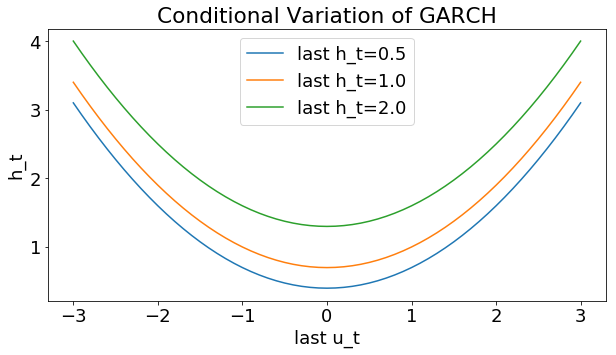

In [25]:
last_u_t = np.arange(-3, 3.1, 0.1)
def create_h_t(last_h_t, alpha, beta, omega):
    return omega + beta * last_h_t + alpha * last_u_t * last_u_t

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(last_u_t, create_h_t(0.5, alpha=0.3, beta=0.6, omega=0.1), linewidth=1.5, label='last h_t=0.5')
ax.plot(last_u_t, create_h_t(1.0, alpha=0.3, beta=0.6, omega=0.1), linewidth=1.5, label='last h_t=1.0')
ax.plot(last_u_t, create_h_t(2.0, alpha=0.3, beta=0.6, omega=0.1), linewidth=1.5, label='last h_t=2.0')
plt.legend()
plt.title('Conditional Variation of GARCH')
ax.set_xlabel('last u_t')
ax.set_ylabel('h_t')
plt.show()

ARCHモデルと同様前期の $u_t$ の絶対値が大きいほど条件付き分散は大きくなる。  
また、前期の $u_t$ の絶対値が同じなら前期の $h_t$ が大きい方が条件付き分散は大きくなる。  
＝ もし前期の誤差が小さくても、前期の分散が大きければ今期の分散は大きくなる。

しかし、先に述べたように前期の誤差が正でも負でも今期の分散への影響の同じというのは現実にそぐわない。  
Cf. レバレッジ効果： 負のショックがよりボラティリティへ大きな影響をもつこと。以下のような説明がなされる。
- 企業の株価が下落すると企業の財務レバレッジが大きくなる（自己資本比率が小さくなる）ので、株式のリスクが高くなる。
- 投資家が心理的に負のショックに反応しやすい。

そこで**GJRモデル**。

$$ \begin{cases} y_t = \mu_t + u_t = \mu_t + \sqrt{h_t} v_t , \; \; v_t \sim {\rm iid} \, N(0,1) \\ h_t = \begin{cases} \omega + \beta h_{t-1} + \alpha u_{t-1}^2 &(u_{t-1} \geqq 0)\\ \omega + \beta h_{t-1} + \alpha u_{t-1}^2 + \gamma u_{t-1}^2 &(u_{t-1} < 0) \end{cases} \end{cases} \tag{7.10}$$

これで負のショックの方がボラティリティへの影響が大きい、というようにできる（めっちゃ力技）。例えば以下。

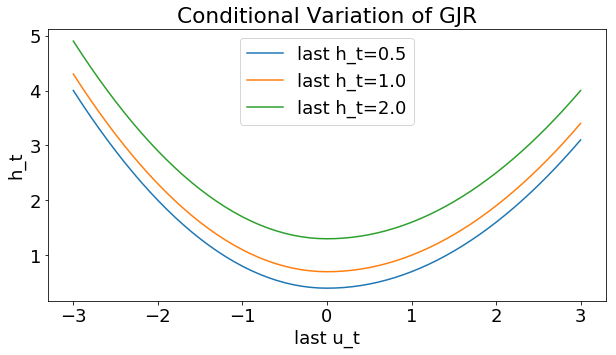

In [30]:
last_u_t = np.arange(-3, 3.1, 0.1)
def create_h_t(last_h_t, alpha, beta, omega, gamma):
    return omega + beta * last_h_t + alpha * last_u_t * last_u_t + \
           np.where(last_u_t < 0, gamma, 0.0) * last_u_t * last_u_t

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(last_u_t, create_h_t(0.5, alpha=0.3, beta=0.6, omega=0.1, gamma=0.1), linewidth=1.5, label='last h_t=0.5')
ax.plot(last_u_t, create_h_t(1.0, alpha=0.3, beta=0.6, omega=0.1, gamma=0.1), linewidth=1.5, label='last h_t=1.0')
ax.plot(last_u_t, create_h_t(2.0, alpha=0.3, beta=0.6, omega=0.1, gamma=0.1), linewidth=1.5, label='last h_t=2.0')
plt.legend()
plt.title('Conditional Variation of GJR')
ax.set_xlabel('last u_t')
ax.set_ylabel('h_t')
plt.show()

その他のGARCHモデル：

- **EGARCHモデル** ： 条件付き分散の対数を回帰したモデル。パラメータへの制約が不要。
- **GARCH-Mモデル** ：条件付き分散の値が条件付き期待値側に影響するモデル。ハイリスクハイリターンを表現できる。

## 7.3 GARCHモデルの統計的推測

### 7.3.1 GARCHモデルの推定

GARCHモデルはわかった。こういうのね。

$$ \begin{cases} y_t = \mu_t + u_t = \mu_t + \sqrt{h_t} v_t \\ h_t = \omega + \beta h_{t-1} + \alpha u_{t-1}^2 \end{cases} \tag{7.8}$$

どうやってパラメータを同定するの。→ だいたい最尤法による。以下を最大化する。

$$ \mathcal{L}(\theta) = \sum_{t=1}^{T} \log f_{Y_t|\Omega_{t-1}}(y_t|\Omega_{t-1};\theta) \tag{2.34}$$

尤度 $f_{Y_t|\Omega_{t-1}}(y_t|\Omega_{t-1};\theta)$ の形は $v_t$ の分布として何を仮定するかによる。だいたい以下のいずれかが仮定される。
- $v_t \sim {\rm iid} \, N(0,1)$ （正規分布）のとき
- $(\sqrt{\nu}/\sqrt{\nu - 2})\cdot v_t \sim {\rm iid} \, t(\nu)$ （t分布）のとき（※ $\sqrt{\nu}/\sqrt{\nu - 2}$ は分散を1にするための係数）
- $v_t \sim {\rm iid} \, {\rm GED}(\nu)$ （一般化誤差分布；GED）のとき

---

t分布とGEDはどんな表式？ 本当に裾が厚いの？

$$ N(0,1) = \frac{1}{\sqrt{2 \pi}} \exp \left( -\frac{x^2}{2}\right)$$
$$ t(\nu) = \frac{\Gamma \bigl( (\nu + 1)/2 \bigr)}{\sqrt{\nu \pi} \, \Gamma(\nu / 2)} \left( 1 + \frac{t^2}{\nu}\right)^{-(\nu + 1)/2} \; \xrightarrow[\nu \to \infty]{} \; N(0,1)$$
$$ {\rm GED}(\nu) = \frac{1}{2^{\nu + 1}\Gamma(\nu + 1)} \exp \left( -\frac{|x|^\frac{1}{\nu}}{2}\right) \; \xrightarrow[\nu \to 2]{} \; N(0,1)$$

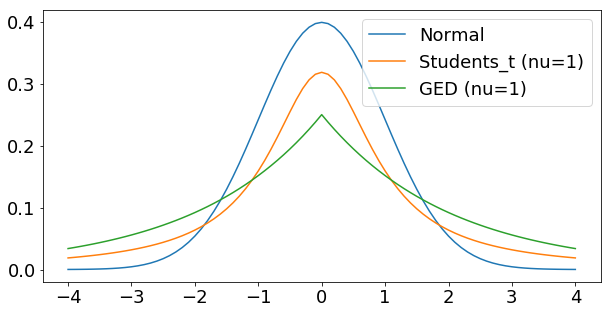

In [38]:
import scipy
import math

def my_normal(x):
    return (1.0 / np.sqrt(2.0 * math.pi)) * np.exp(- 0.5 * x * x)

def my_Students_t(x, nu=1.0):
    return (scipy.special.gamma(0.5 * (nu + 1.0)) / (np.sqrt(nu * math.pi) * scipy.special.gamma(0.5 * nu))) * \
           np.power(1.0 + x * x / nu, - 0.5 * (nu + 1.0))
    
def my_GED(x, nu=1.0):
    return (1.0 / (np.power(2.0, nu + 1.0) * scipy.special.gamma(nu + 1.0))) * \
           np.exp(- 0.5 * np.power(abs(x), 1.0 / nu))

x = np.arange(-4, 4.1, 0.1)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
ax.plot(x, my_normal(x), linewidth=1.5, label='Normal')
ax.plot(x, my_Students_t(x), linewidth=1.5, label='Students_t (nu=1)')
ax.plot(x, my_GED(x), linewidth=1.5, label='GED (nu=1)')
plt.legend()
plt.show()

尤度 $f_{Y_t|\Omega_{t-1}}(y_t|\Omega_{t-1};\theta)$ は上の分布で変数を $y_t$、平均を $\mu_t$、分散を $h_t$ とするだけ。

**$v_t \sim {\rm iid} \, N(0,1)$ のとき**

$$f_{Y_t|\Omega_{t-1}}(y_t|\Omega_{t-1};\theta)=\frac{1}{\sqrt{2 \pi h_t}} \exp \left( -\frac{(y_t - \mu_t)^2}{2 h_t}\right)$$

**$(\sqrt{\nu}/\sqrt{\nu - 2})\cdot v_t \sim {\rm iid} \, t(\nu)$ のとき**

$$f_{Y_t|\Omega_{t-1}}(y_t|\Omega_{t-1};\theta)=\frac{\Gamma \bigl( (\nu + 1)/2 \bigr)}{\sqrt{\pi (\nu - 2) h_t} \, \Gamma(\nu / 2)} \left( 1 + \frac{(y_t - \mu_t)^2}{(\nu - 2 ) h_t}\right)^{-(\nu + 1)/2}$$

**$v_t \sim {\rm iid} \, {\rm GED}(\nu)$ のとき**

教科書の式すぐ検算できなかったから検算してない。  
検算してないけどなぜかこれだけ対数尤度になっていると思う。

### 7.3.2 GARCHモデルの選択と診断

**モデル選択**

じゃあ GARCH(1,1) と GARCH(2,1) のどちらがよいとかはどうやって決めるの。→ AIC とか BIC が小さい方。

---

p161. 「AICやSICなどの情報量基準が正当化されるのは、真のモデルを含むパラメトリックモデルに対してだけである。～」  
真のモデルって何…（分析対象時系列がコンピュータから生成されていれば真のモデルが存在しますが）。

たぶん、その時系列が生成されたメカニズムは GARCH だろうという信念をもっているときに、GARCH(r,m) でのフィッティングのAICと、ARCH(m) でのフィッティングのAICを比較するのはたぶん問題ない。例えばそれぞれで GARCH(1,1) と ARCH(1) が同定されていたとして、ARCH(1) の方がよかったとかだったら、「GARCH だと思っていたけど実は $h_{t-1}$ の項はパラメータを追加するに見合うほど尤度を大きくしていなかったんだね」となるだけ。  

その時系列が生成されたメカニズムは GARCH だろうという信念をもっているときに、GARCH でのフィッティングと GJR でのフィッティングを比較するのも問題はたぶんない。GJR の方がよかったら、「$\gamma$ の項があった方が、パラメータを追加するペナルティ以上に尤度が改善するね」となる。  

ただし、その時系列が生成されたメカニズムは GARCH だろうという信念をもっているときに EGARCH でのフィッティング結果とのAICと比較するのは普通はできない。EGARCHの方がよかったとしても、「パラメータを追加するペナルティ以上に尤度が改善するね」とならない。GARCH にパラメータを追加して EGARCH にたどり着けないから。  

普通はできないんだが、GARCH のフィッティング結果と EGARCH のフィッティング結果を比べるよい手法も他にないので、AIC で比較してしまうこともある。  

なんかそんな感じだと思います。

---

**モデル診断**

- 標準化残差 $\hat{v}_t = \hat{u}_t / \sqrt{\hat{h}_t}$ とその2乗の自己相関を検定しておこう。ただし、真の $v_t$ ではなくその推定値 $\hat{v}_t$ を使用しているので検定統計量のしたがう分布に補正が入ることに注意しよう。 → 51ページ

## 7.4 多変量GARCHモデル

※ ベクトルを太字で書きません。悪しからず。 

**n変量GARCHモデル**

$$ y_t = \mu_t + u_t = \mu_t + H_t^{1/2} v_t, \; v_t \sim {\rm iid}\, N(0, {\rm I}_n) \tag{7.13}$$

$H_t$ は $y_t$ の条件付き分散共分散行列となる。  
$H_t$ をどうモデリングするかによって多変量GARCHモデルには色々ある。

### 7.4.1 VECモデル

**VECモデル** ： GARCHを自然に多変量にごり押したモデル。つまり、単変量GARCHは「$h_t$ を $h_{t-1}$ と $u_{t-1}^2$ で回帰しよう」 といったモデルだったが、これを自然に多変量にごり押すなら、「$H_t$ の各要素 $h_{t,11}, \cdots, h_{t,nn}$ を $H_{t-1}$ の全要素と $u_{t-1} u_{t-1}^{\top}$ の全要素で回帰しよう」となる。つまり、VEC(1,1) モデルはこう。

$${\rm vech}(H_t) = c + B {\rm vech} (H_{t-1}) + A {\rm vech} (u_{t-1} u_{t-1}^{\top}) \tag{7.14}$$

対象時系列が3次元のときに ${\rm vech}$ をつかわずにかくとこう。

$$ \left( \begin{array}{c} h_{t,11} \\ h_{t,21} \\ h_{t,31} \\ h_{t,22} \\ h_{t,32} \\ h_{t,33} \end{array} \right) = c + B \left( \begin{array}{c} h_{t-1,11} \\ h_{t-1,21} \\ h_{t-1,31} \\ h_{t-1,22} \\ h_{t-1,32} \\ h_{t-1,33} \end{array} \right) + A \left( \begin{array}{c} u_{t-1,1}u_{t-1,1} \\ u_{t-1,2}u_{t-1,1} \\ u_{t-1,3}u_{t-1,1} \\ u_{t-1,2}u_{t-1,2} \\ u_{t-1,3}u_{t-1,2} \\ u_{t-1,3}u_{t-1,3} \end{array} \right)$$

---

ここで ${\rm vech}$ とは行列の下三角にある成分を並べてベクトルにするだけの作用素。例えば $H$ が 3×3 行列だったら、

$${\rm vech}(H) = {\rm vech}\left(\begin{array}{ccc}h_{11} & h_{12} & h_{13} \\ h_{21} & h_{22} & h_{23} \\ h_{31} & h_{32} & h_{33} \end{array}\right) = \left( \begin{array}{c} h_{11} \\ h_{21} \\ h_{31} \\ h_{22} \\ h_{32} \\ h_{33} \end{array} \right) $$

---

これはこれでいいんだが自然にごり押しすぎてパラメータ数がやばい。例えば対象時系列が3次元だったら、条件付き分散共分散行列にvech作用素を適用後のベクトルは6次元だから、$c$ は6次元で、$B$ は6×6次元で、$A$ も6×6次元なので、VEC(1,1)モデルは合計78個もパラメータがあることになりやばい。

**DVECモデル (diagonal VEC model)** ： VECモデルで素朴に「$H_t$ の各要素を $H_{t-1}$ の全要素と $u_{t-1} u_{t-1}^{\top}$ の全要素で回帰しよう」としたらパラメータ数がやばかったので、「$H_t$ の各要素を $H_{t-1}$ の同じ位置の要素と $u_{t-1} u_{t-1}^{\top}$ の同じ位置の要素だけで回帰しよう」ということにしたモデル（つまり、各要素に注目すると単変量GARCH）。DVEC(1,1)モデルはこう（ただし、$\odot$ はアダマール積＝行列の同じ成分ごとの積）。

$$H_t = C + B \odot H_{t-1} + A \odot (u_{t-1} u_{t-1}^{\top}) \tag{7.15}$$

$A, B, C$ は対称行列なので、3次元のDVEC(1,1)モデルならパラメータ数はたったの6×3個。  
なお、$H_t$ は分散共分散行列なので正定値であってほしいが、(7.15) 式において $C$ を正定値、$A, B$ を半正定値に制約すればそれを保証できる（VECモデルは？）。

ただし、DVECモデルは見ての通り「過去の同じ要素の影響は受けるが他の要素の影響は受けない」というモデルであり、これは多変量時系列の相関構造を分析しようというときには仮定としてしんどすぎる。  

ここまでしんどいモデルしかない。

### 7.4.2 BEKKモデルとCCCモデル

**BEKKモデル** ： 以下のようなモデル。$C$ は対称行列。パラメータも少ないし、条件付き分散共分散行列が、過去の条件付き分散共分散行列の別の要素の影響を受けるのを表現できる。

$$H_t = C + B H_{t-1} B^{\top} + A u_{t-1} u_{t-1}^{\top} A^{\top} \tag{7.16}$$

$C$ が正定値であれば $H_t$ も正定値になる。

**CCCモデル** ： 相関行列は時間変化しないとする。条件付き分散共分散行列の対角成分だけを何らかの単変量GARCHモデルでモデリングしておく。その時不変な相関行列 $R$ を推定する。

$$D_t = \left(\begin{array}{ccc} \sqrt{h_{11,t}} & \cdots & 0 \\ \vdots & \ddots & \vdots \\ 0 & \cdots & \sqrt{h_{nn,t}} \end{array} \right) \tag{7.17}$$

$$H_t = D_t R D_t \tag{7.18}$$

CCCモデルで株価の銘柄間や市場間の分析をしている研究をみたことはあります（BEKKモデルによる研究もあるのでしょうが）。つまり、  
「X社の株式、Y社の株式、Z社の株式の間にはどんな相関構造があるんだろう」  
「アメリカの株式市場とヨーロッパの株式市場の間にどんな相関構造があるんだろう」  
というのを、相関構造は時不変と仮定して求めるといったものです。

## 7.5 相関変動モデル

### 7.5.1 DCCモデル

### 7.5.2 コピュラ

### 7.5.3 DCDモデル